The goal of this project is to identify if there are any patterns or themes to the types of species that become endangered.

I will answer the following questions:


1.   What is the distribution of conservation_status for animals?
2.   Are certain types of species more likely to be endangered?
3.   Are the differences between species and their conservation status significant?
4.   Which species were spotted the most at each park?



In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [23]:
observations = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')

#observations.head()
species.head()

#print(species.conservation_status.value_counts())


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


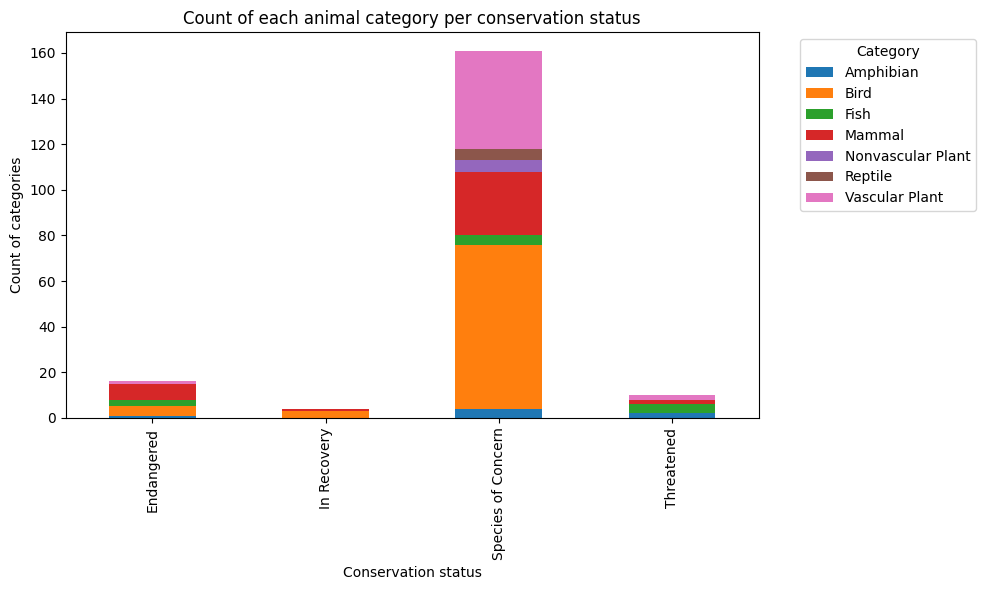

In [4]:
# 1) Distribution of conservation_status

pivot_data = species.pivot_table(index='conservation_status', columns='category', aggfunc='size', fill_value=0)

pivot_data.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel('Conservation status')
plt.ylabel('Count of categories')
plt.title('Count of each animal category per conservation status')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

In [10]:
#2.   Are certain types of species more likely to be endangered?
#     To do this, the number of endangered species in each category to the total number of species in each category are compared.


for category in species['category'].unique():
  total = len(species[species["category"] == category])
  endangered = len(species[(species["category"] == category) & (species['conservation_status'] == "Endangered")])
  print(f"{category}: {endangered}/{total} ({round(endangered/total * 100, 2)}%)")

# As can be seen, both vascular and nonvascular plants have virtually no endangered species. The same can be said for reptiles and amphibians. The most endangered animal categories are mammals and fish.
# Although the total number of endangered species is relatively small, it looks as though some types of species are more likely to be endangered.


Mammal: 7/214 (3.27%)
Bird: 4/521 (0.77%)
Reptile: 0/79 (0.0%)
Amphibian: 1/80 (1.25%)
Fish: 3/127 (2.36%)
Vascular Plant: 1/4470 (0.02%)
Nonvascular Plant: 0/333 (0.0%)


In [12]:
# 3. Are the differences between species and their conservation status significant?
# To find whether the difference between these two variables are significant, Chi-Square Test can be used.

contingency_table = pd.crosstab(species['category'], species['conservation_status'])

chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("Chi-square Statistic:", chi2_stat)
print("Degrees of Freedom:", dof)
print("P-value:", p_val)
print("Expected Frequencies:\n", expected)

# Since the p-value is < 0.05, there is a significant relationship between these two variables, meaning that certain species are more likely to have specific conservation statuses than would be expected by chance.

Chi-square Statistic: 53.91636314015659
Degrees of Freedom: 18
P-value: 1.8909788349761653e-05
Expected Frequencies:
 [[ 0.58638743  0.14659686  5.90052356  0.36649215]
 [ 6.61780105  1.65445026 66.59162304  4.13612565]
 [ 0.92146597  0.23036649  9.27225131  0.57591623]
 [ 3.18324607  0.79581152 32.03141361  1.9895288 ]
 [ 0.41884817  0.10471204  4.21465969  0.2617801 ]
 [ 0.41884817  0.10471204  4.21465969  0.2617801 ]
 [ 3.85340314  0.96335079 38.77486911  2.40837696]]


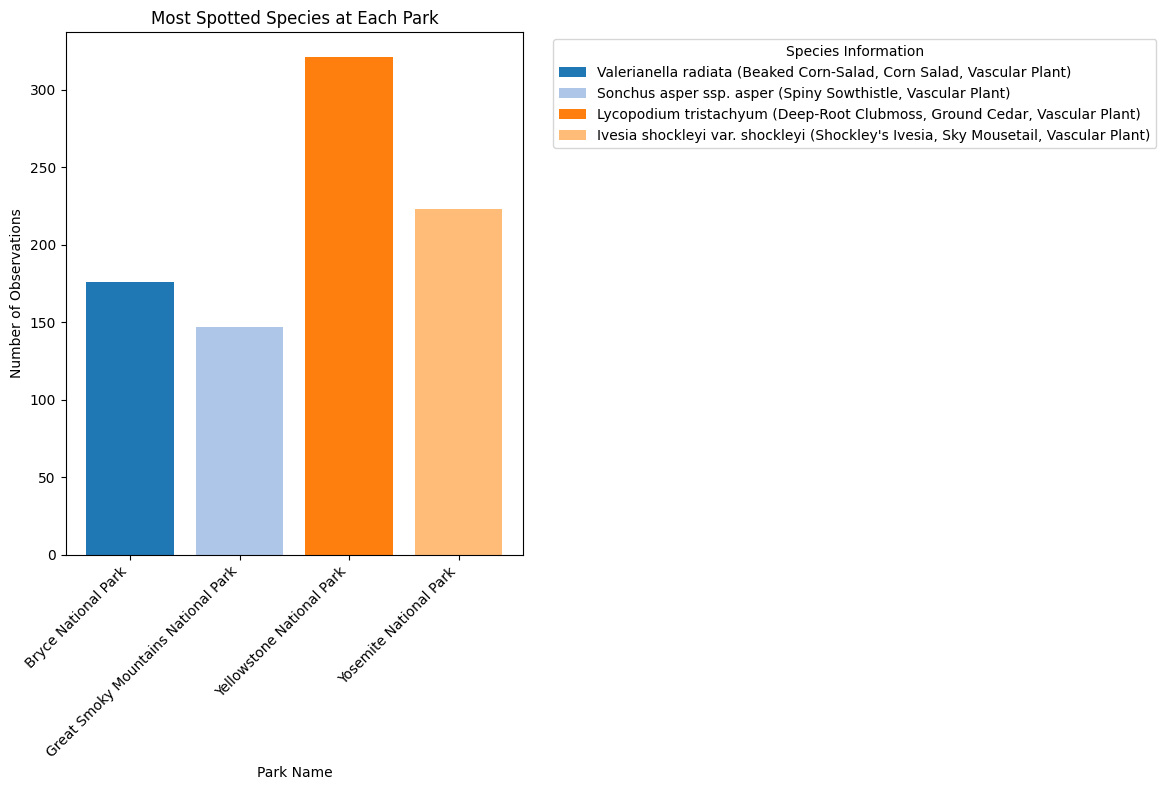

In [25]:
# 4. Which species were spotted the most at each park?

observations_merged = observations.merge(species[['scientific_name', 'common_names', 'category']], on='scientific_name')

max_observations_per_park = observations_merged.loc[observations_merged.groupby('park_name')['observations'].idxmax()]

plt.figure(figsize=(12, 8))
colors = plt.cm.tab20.colors

for i, (index, row) in enumerate(max_observations_per_park.iterrows()):
    label = f"{row['scientific_name']} ({row['common_names']}, {row['category']})"
    plt.bar(row['park_name'], row['observations'], color=colors[i % len(colors)], label=label)

plt.xlabel('Park Name')
plt.ylabel('Number of Observations')
plt.title('Most Spotted Species at Each Park')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Species Information', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()